<a href="https://colab.research.google.com/github/ManupatiEshwar/reniforecement/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned Q-table:
[[8.21942046e-02 4.73214330e-02 7.92687936e-02 8.31947134e-02]
 [2.28356737e-02 2.32169208e-02 4.68378502e-03 3.12073422e-02]
 [1.41225900e-02 1.18992597e-02 4.77752787e-03 1.96731025e-02]
 [2.91764989e-03 4.22058111e-04 2.54279054e-04 1.99186426e-02]
 [7.38353911e-02 3.66340926e-02 4.84971686e-02 3.37274476e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.20994351e-06 1.91767432e-04 5.22271297e-04 2.43493855e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.00368779e-02 1.63238494e-02 1.35844216e-02 1.22311279e-01]
 [2.82232781e-02 2.16637412e-02 2.57229979e-02 1.56698406e-03]
 [1.00927657e-02 5.69670714e-03 2.36682139e-03 2.17216764e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.27509154e-03 1.76214397e-01 3.02667404e-01 1.18944756e-01]
 [9.65773722e-02 6.05468406e-01 2.26451109e-01 2.01922700e-01]
 [0.00000000e+00 0.00000000e+00 0.0000

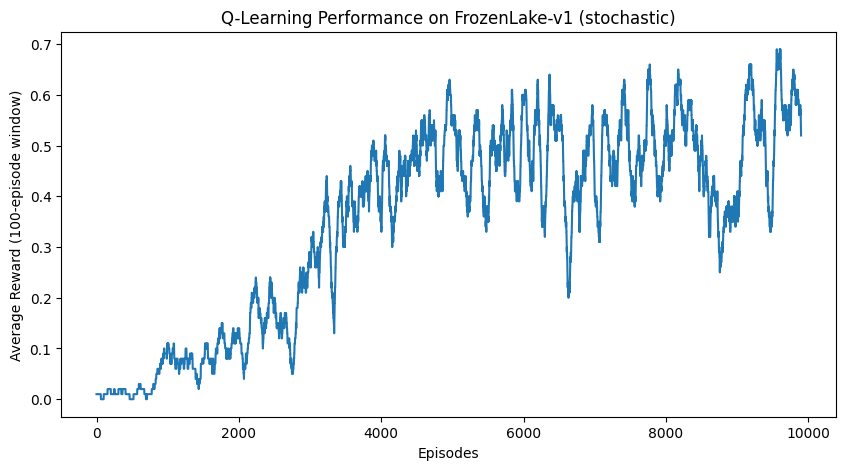

In [3]:
!pip install gymnasium[classic_control] matplotlib numpy --quiet

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", is_slippery=True, render_mode=None)
n_states = env.observation_space.n
n_actions = env.action_space.n

alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999
n_episodes = 10000
max_steps = 100

Q = np.zeros((n_states, n_actions))

reward_per_episode = []

for episode in range(n_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        best_next_action = np.argmax(Q[next_state, :])
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * Q[next_state, best_next_action] - Q[state, action]
        )

        state = next_state
        total_reward += reward

        if done:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    reward_per_episode.append(total_reward)

print("Learned Q-table:")
print(Q)

policy = np.argmax(Q, axis=1)
print("\nLearned Policy (action per state):")
print(policy.reshape((4,4)))

window = 100
rewards_moving_avg = np.convolve(reward_per_episode, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10,5))
plt.plot(rewards_moving_avg)
plt.xlabel('Episodes')
plt.ylabel('Average Reward (100-episode window)')
plt.title('Q-Learning Performance on FrozenLake-v1 (stochastic)')
plt.show()
